In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:17<00:00, 181MB/s]
100% 2.29G/2.29G [00:17<00:00, 144MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load and preprocess datasets
def load_and_preprocess_data(train_dir, validation_dir, img_size=(256, 256), batch_size=32):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, validation_generator

In [ ]:
train_dir = '/content/chest_xray/train'
validation_dir = '/content/chest_xray/test'
img_size = (256, 256)
batch_size = 32

train_data, validation_data = load_and_preprocess_data(train_dir, validation_dir, img_size, batch_size)

# Define the model
def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
input_shape = (img_size[0], img_size[1], 3)
model = create_cnn_model(input_shape)
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_13 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=12,
    validation_data=validation_data
)

Epoch 1/12
163/163 [==============================] - 1216s 7s/step - loss: 0.6811 - accuracy: 0.8391 - val_loss: 24.3873 - val_accuracy: 0.6250
Epoch 2/12
163/163 [==============================] - 1196s 7s/step - loss: 0.4190 - accuracy: 0.8645 - val_loss: 24.3406 - val_accuracy: 0.6250
Epoch 3/12
163/163 [==============================] - 1194s 7s/step - loss: 0.3386 - accuracy: 0.8719 - val_loss: 1.5578 - val_accuracy: 0.6346
Epoch 4/12
163/163 [==============================] - 1172s 7s/step - loss: 0.3080 - accuracy: 0.8953 - val_loss: 1.2341 - val_accuracy: 0.4167
Epoch 5/12
163/163 [==============================] - 1175s 7s/step - loss: 0.2477 - accuracy: 0.9078 - val_loss: 0.6444 - val_accuracy: 0.7131
Epoch 6/12
163/163 [==============================] - 1177s 7s/step - loss: 0.2557 - accuracy: 0.9001 - val_loss: 1.3545 - val_accuracy: 0.4167
Epoch 7/12
163/163 [==============================] - 1184s 7s/step - loss: 0.2317 - accuracy: 0.9036 - val_loss: 0.5147 - val_accurac

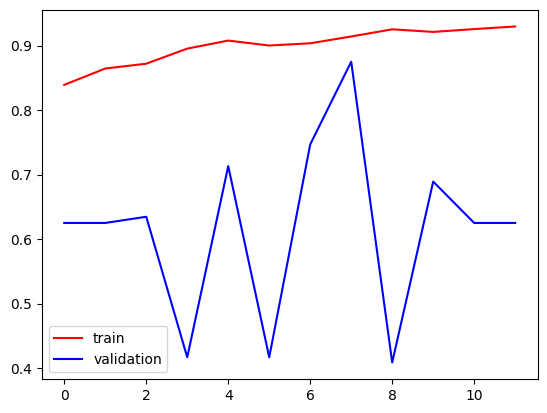

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

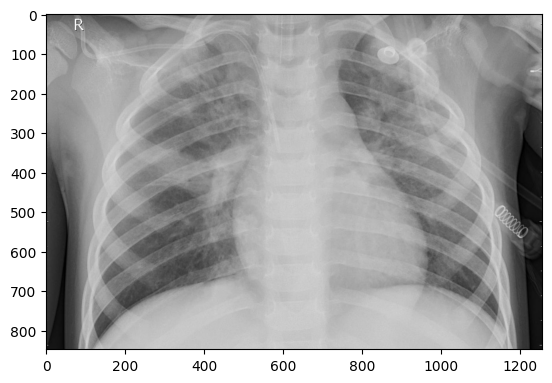

In [ ]:
# Load and display a test image
import cv2

test_img_path = '/content/Pneumonia_Chest_xray.jpeg'
test_img = cv2.imread(test_img_path)
plt.imshow(test_img)
plt.show()

In [ ]:
# Resize the test image and prepare it for model prediction
test_img_resized = cv2.resize(test_img, (256, 256))
test_input = test_img_resized.reshape((1, 256, 256, 3))

In [ ]:
# Make predictions on the test image using the trained model
prediction = model.predict(test_input)
print("Prediction:", prediction)
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia detected!")
else:
    print("Prediction: No pneumonia detected!")

1/1 [==============================] - 0s 61ms/step
Prediction: [[1.]]
Prediction: Pneumonia detected!


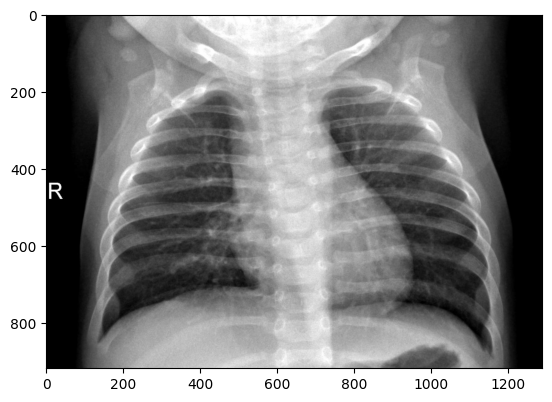

In [ ]:
# Load and display a test image
import cv2

test_img_path = '/content/normal_Chest_Xray.jpeg'
test_img = cv2.imread(test_img_path)
plt.imshow(test_img)
plt.show()

In [ ]:
# Resize the test image and prepare it for model prediction
test_img_resized = cv2.resize(test_img, (256, 256))
test_input = test_img_resized.reshape((1, 256, 256, 3))

In [ ]:
# Make predictions on the test image using the trained model
prediction = model.predict(test_input)
print("Prediction:", prediction)
if prediction[0][0] > 0.5:
    print("Prediction: Pneumonia detected!")
else:
    print("Prediction: No pneumonia detected!")

1/1 [==============================] - 0s 61ms/step
Prediction: [[0.]]
Prediction: No pneumonia detected!
